In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# %matplotlib         :le indicas que la visualizacion la haga en una ventana a parte
# %matplotlib inline (Viene por defecto en jupyter) : le indicas que la visualizacion sea debajo de la celda

# DFS algoritm (Deep first search)
Basicamente la idea del algortimo es ir explorando el grafo eligiendo el primer vertice que encuentre y repetir nuevamente hasta que haya visitado todos los nodos.

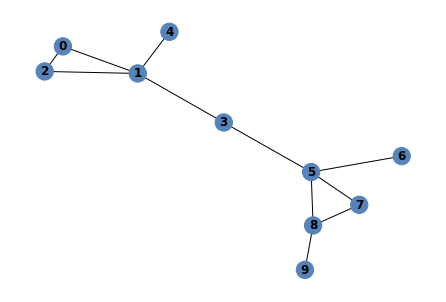

In [5]:
nodes = range(9)
edges = [(0,1), (0,2), (1,2), (1,3), (1,4), (3,5), (5,6), (5,7), (5,8), (7,8), (8, 9)]
color_map=["#5583ba"] * 10
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = nx.spring_layout(g)

nx.draw(g, node_color=color_map, with_labels=True, font_weight='bold')
#plt.savefig("img/dfs/test.png")

In [6]:
def bfs(g, initial, visited=None, path=None):
    """Devuelme un camino de la trayectoria que siguio el algoritmo"""    
    if visited is None:
        visited = [False] * len(g)
        path = [] # Ira agregando los nodos conforme fueron descubiertos
    visited[initial] = True    
    #print(initial, end=" ")
    path.append(initial)
    for node_adj in g.adj[initial]:
        if not visited[node_adj]:                
            bfs(g, node_adj, visited, path)
    # print('i: {}'.format(i)) # Aqui podemos vernos el backtrack
    return path

In [7]:
bfs(g, 0)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 4]

## Animacion del algoritmo

In [12]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
#plt.close('all')
import networkx as nx
import matplotlib.animation as animation

# Create graph
nodes = range(9)
edges = [(0,1), (0,2), (1,2), (1,3), (1,4), (3,5), (5,6), (5,7), (5,8), (7,8), (8, 9)]
num_nodes = len(range(9)) + 1 # Porque inicia en [0, 1, .... 9] con range(9)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

node_colors = [0] * (num_nodes)  # Inicializamos todos a un color
velocidad = 700  # Entre mayor numero es mas lento la animacion

# draw graph
pos   = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G,pos)

plt.axis('off')  # Eliminamos los ejes
fig = plt.gcf()  # Obtenemos la figure

# Algoritmo
path = bfs(G, 0) # Creando un generator comprehensions
#print(f'Path: {path}')
gen = (x for x in path)

def update_plot(frames, nodes, node_colors):
    global gen
    # Ajustamos el cambio del color
    try:
        next_node = next(gen)
    except StopIteration:
        # Creamos un numero generador e inicializamos la cuenta
        gen = (x for x in path)
        next_node = next(gen)
    
    node_colors[next_node] = 1  # Change color
    #print(f'Next_node: {next_node}')
    #print(node_colors)
    # Cambiamos el color a todos con el arreglo
    nodes.set_array(node_colors)
    return nodes,

# Los frames se iran repitiendo una y otra vez en un bucle infinito
ani = animation.FuncAnimation(fig, update_plot, frames=num_nodes, interval=velocidad,
                                  fargs=(nodes, node_colors))
#ani.save('./bfs.gif', writer='pillow')  ## Para guardarlo en un gif
plt.show()

Using matplotlib backend: TkAgg


## Aplicaciones

## Cycle detection

## Fiding connected components

## Topologia sort

## Maze generated

- https://makeschool.org/mediabook/oa/tutorials/trees-and-mazes/generating-a-maze-with-dfs/


## Referencias
https://www.youtube.com/watch?v=PMMc4VsIacU&list=WL&index=9&t=6s&ab_channel=Reducible

## Shortcut
https://gist.github.com/discdiver/9e00618756d120a8c9fa344ac1c375ac

Para teclado de latinoamatica cambia un poco sera cuestion probar,
eg.
C-/ : toggle comments <=> C-} toggle comment for teclados latam qwerty